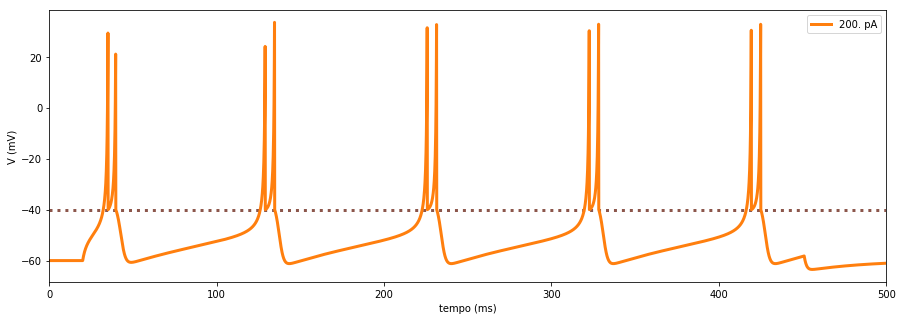

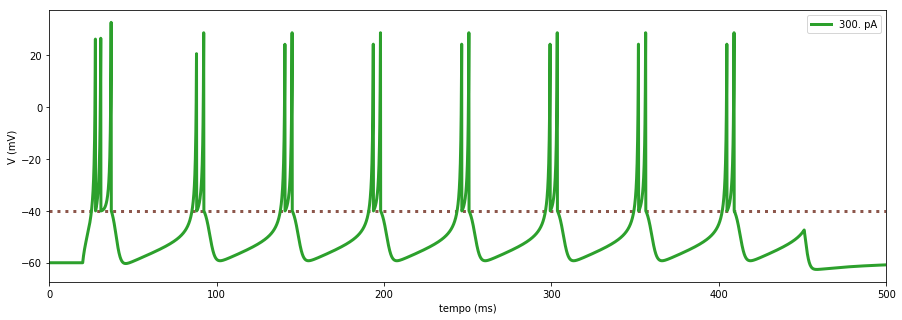

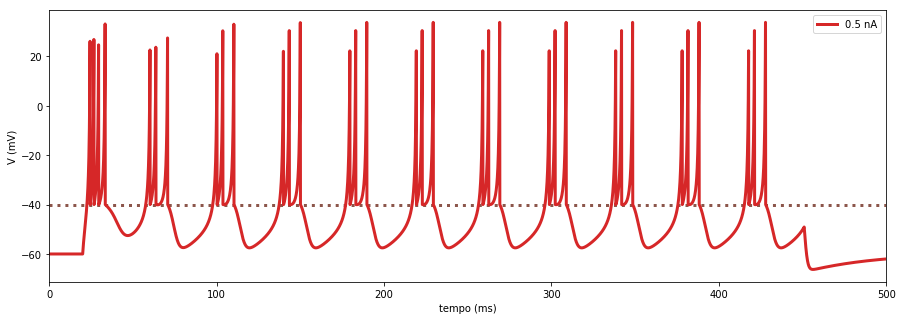

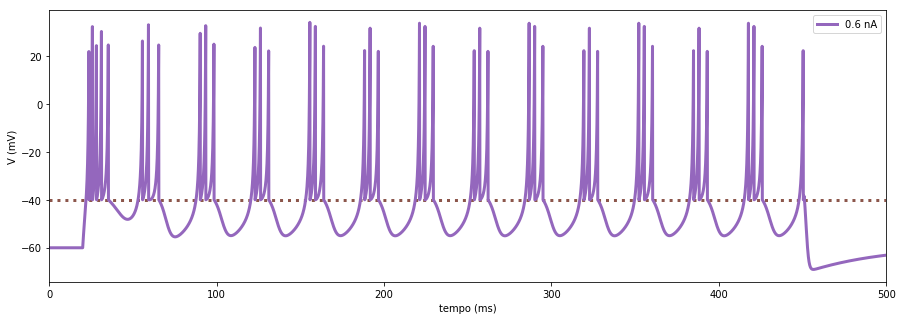

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
from brian2 import *
from neurodynex.tools import input_factory, plot_tools

C = 50*pF; EL = -60*mV; VT = -40*mV; a = 0.03/ms; b = 1*pA/mV; Vmax = 35*mV; 
vreset = -40*mV; d = 150*b2.pA 
k = 1.5*pA/mV**2;
duration = 500*ms;


corrente = [200,300,500,600]
v_membrana = [None]*len(corrente)

for i in range(len(corrente)):
    Ix = input_factory.get_step_current(
    t_start=20, t_end=450, unit_time=b2.ms,
    amplitude= corrente[i]*b2.pA) 

    start_scope()
    eqs = '''dvm/dt = ((k/C)*(((vm-EL)*(vm-VT)))- (u/C) + (Ix(t,i)/C)) : volt
         du/dt = (a)*(b*(vm-EL)-u) : amp'''
    G = NeuronGroup(1, eqs,
                    threshold='vm > Vmax',
                    reset='vm= vreset; u = u + d', method='euler', dt= 0.1*ms)

    statemon = StateMonitor(G, ["vm","u"], record=True) # monitor de potencial
    spikemon = SpikeMonitor(G) # monitor de spikes
    G.vm = EL
    G.u = 0
    
    # tempo de simulação
    run(duration)
    # plot
    v_membrana[i] = statemon.vm[0]/b2.mV
    
fig = figure(figsize=(15, 5))
plt.figure(1)
axhline(-40, ls=':', c='C5', lw=3)
plt.plot(statemon.t/b2.ms, v_membrana[0], c='C1', lw=3, label=corrente[0]*pA)
plt.xlim(0, 500)
plt.legend(loc=1)
plt.ylabel('V (mV)')
plt.xlabel('tempo (ms)')

fig = figure(figsize=(15, 5))
plt.figure(2)
axhline(-40, ls=':', c='C5', lw=3)
plt.plot(statemon.t/b2.ms, v_membrana[1], c='C2', lw=3, label=corrente[1]*pA)
plt.xlim(0, 500)
plt.legend(loc=1)
plt.ylabel('V (mV)')
plt.xlabel('tempo (ms)')

fig = figure(figsize=(15, 5))
plt.figure(3)
axhline(-40, ls=':', c='C5', lw=3)
plt.plot(statemon.t/b2.ms, v_membrana[2], c='C3', lw=3, label=corrente[2]*pA)
plt.xlim(0, 500)
plt.legend(loc=1)
plt.ylabel('V (mV)')
plt.xlabel('tempo (ms)')

fig = figure(figsize=(15, 5))
plt.figure(4)
axhline(-40, ls=':', c='C5', lw=3)
plt.plot(statemon.t/b2.ms, v_membrana[3], c='C4', lw=3, label=corrente[3]*pA)
plt.xlim(0, 500)
plt.legend(loc=1)
plt.ylabel('V (mV)')
plt.xlabel('tempo (ms)')

plt.show()#%%